In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from src.models.LogisticRegClassifier import LogisticRegClassifier

In [8]:
LogisticRegression = LogisticRegClassifier()
#load train and test split
X_train = pd.read_csv('../data/processed/train_processed.csv')
y_train = X_train['class']
X_train = X_train.drop(['class'], axis=1)
X_test = pd.read_csv('../data/processed/test_processed.csv')
y_test = X_test['class']
X_test = X_test.drop(['class'], axis=1)
#encode labels
label_encoder = LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [9]:
# random search for hyperparameter tuning for logistic regression
list_dict = []
dict1 = {'solver' : ['lbfgs', 'newton-cg', 'newton-cholesky','sag'],'penalty' : ['l2',None],'C' : np.logspace(-4, 2, 50), 'class_weight' : ['balanced',None], 'max_iter' : [100, 200, 300, 400, 500], 'multi_class' : ['ovr', 'multinomial'], 'l1_ratio' : np.linspace(0, 1, 50)}
dict2 = {'solver' : ['saga'],'penalty' : ['elasticnet', 'l1', 'l2', None],'C' : np.logspace(-4, 2, 50), 'class_weight' : ['balanced',None], 'max_iter' : [100, 200, 300, 400, 500], 'multi_class' : ['ovr', 'multinomial'], 'l1_ratio' : np.linspace(0, 1, 50)}
dict3 = {'solver' : ['liblinear'],'penalty' : ['l1', 'l2', None],'C' : np.logspace(-4, 2, 50), 'class_weight' : ['balanced',None], 'max_iter' : [100, 200, 300, 400, 500], 'multi_class' : ['ovr', 'multinomial']}
list_dict.append(dict1)
list_dict.append(dict2)
list_dict.append(dict3)
LogisticRegression.hyperparameter_tuning(X_train, y_train, list_dict,'random', 3, 'f1_macro',n_iteration=10)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_i

In [10]:
LogisticRegression.train(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Inference time : 1.423094007703993e-07 seconds
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     10802
           1       0.94      0.88      0.91      3429
           2       0.97      1.00      0.98      3769

    accuracy                           0.96     18000
   macro avg       0.96      0.95      0.95     18000
weighted avg       0.96      0.96      0.96     18000

auc score for class 0:  0.9860202712195714
auc score for class 1:  0.9835888104863748
auc score for class 2:  0.9978032367016881


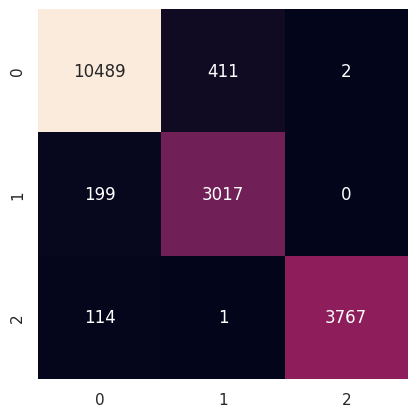

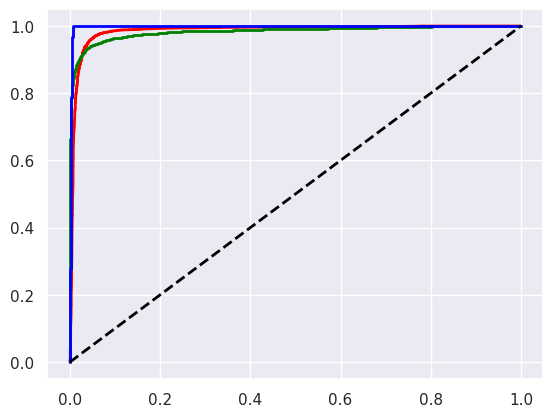

In [11]:
LogisticRegression.evaluate(X_test, y_test)